In [1]:
import pandas as pd
dm = pd.read_csv('Desktop\Iris.csv')
dm = dm.drop('Id',axis=1)

In [2]:
print(dm.Species.dtype)

object


In [3]:
from sklearn import preprocessing

if dm.Species.dtype == 'object':
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(dm.Species.values))
    dm.Species = lbl.transform(list(dm.Species.values))
    
print(dm.Species.dtype)

int64


In [4]:
from sklearn.model_selection import train_test_split

Y = dm.Species.values
X = dm.drop(['Species'],axis=1).values

xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size= 0.20, random_state=27)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
NaiveBayesModel = gnb.fit(xtrain, ytrain)
y_predict = NaiveBayesModel.predict(xtest)
accuracy_score(ytest, y_predict)

0.9

In [8]:
from sklearn.metrics import confusion_matrix
confu_mat = confusion_matrix(ytest,y_predict)
print(confu_mat)

[[ 7  0  0]
 [ 0 10  1]
 [ 0  2 10]]


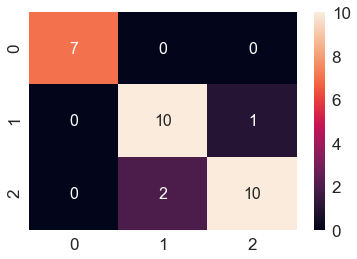

In [10]:
import seaborn as sn

sn.set(font_scale=1.7)
sn.heatmap(pd.DataFrame(confu_mat), annot=True,annot_kws={"size": 16})

In [11]:
from sklearn import svm
from sklearn.metrics import average_precision_score
from sklearn.svm import LinearSVC
xtrain, xtest, ytrain, ytest = train_test_split(X[Y<2],Y[Y<2], test_size= 0.5)

classifier = svm.LinearSVC(random_state=27)
classifier.fit(xtrain, ytrain)
y_sc = classifier.decision_function(xtest)

average_precision = average_precision_score(ytrain, y_sc)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.56


In [12]:
import numpy as np
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

xtrain, xtest, ytrain, ytest = train_test_split(X[Y<2],Y[Y<2], test_size= 0.20)

Average precision-recall score: 0.7300976800976802


Text(0,0.5,'Precision')

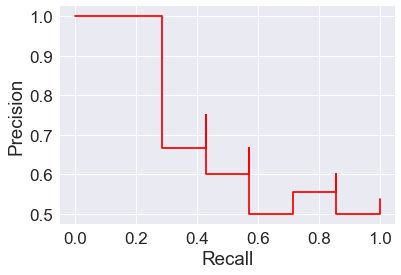

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

classifier = svm.SVC(kernel='linear', random_state=27)
classifier.fit(xtrain, ytrain)
y_sc = classifier.decision_function(xtest)

print('Average precision-recall score:',average_precision_score(ytest, y_sc))
precision, recall, _ = precision_recall_curve(ytest, y_sc)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 0.8431122448979591


Text(0,0.5,'Precision')

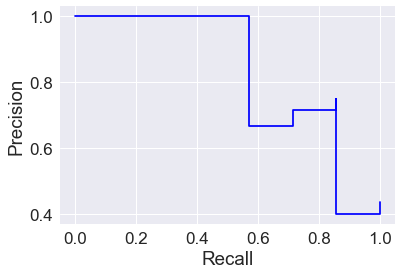

In [16]:
classifier = svm.SVC(kernel='poly', random_state=27)
classifier.fit(xtrain, ytrain)
y_sc = classifier.decision_function(xtest)

print('Average precision-recall score:',average_precision_score(ytest, y_sc))
precision, recall, _ = precision_recall_curve(ytest, y_sc)

plt.step(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')

Average precision-recall score: 0.7347247990105132


Text(0,0.5,'Precision')

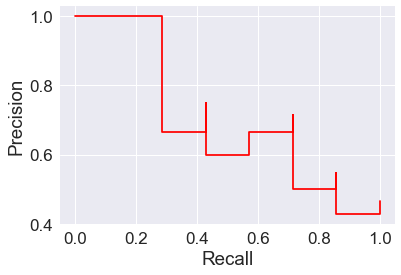

In [17]:
classifier = svm.SVC(kernel='rbf', random_state=27)
classifier.fit(xtrain, ytrain)
y_sc = classifier.decision_function(xtest)

print('Average precision-recall score:',average_precision_score(ytest, y_sc))
precision, recall, _ = precision_recall_curve(ytest, y_sc)

plt.step(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')